<a href="https://colab.research.google.com/github/Kishan-Ved/MLDeepLab/blob/main/GaussianProcessesRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussain Processes Regression
Used to find a surrogate function f (x) using Gaussian Process regression that passes through all (x, F (x)) for
all x ∈ X, such that it interpolates smoothly between them, and extrapolates “well” into the test data,
X′.

In other words, given some data as the prior, derive the posterior predictive distribution of the
corresponding Gaussian Process.

## Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Define the gaussian kernel function
Returns the matrix obtained by:
k(X,X') = σf^2 * exp((-||X-X'||^2/)2*λ^2)

In [ ]:
def gaussian_kernel(X1, X2, l=1.0, sigma_f=1.0):
    n1, d = X1.shape
    n2 = X2.shape[0]

    K = np.zeros((n1, n2))

    for i in range(n1):
        for j in range(n2):
            diff = X1[i] - X2[j]
            K[i, j] = sigma_f ** 2 * np.exp(-0.5 * np.dot(diff, diff.T) / l ** 2) # Radial basis function, l is for lambda

    return K

## Computing the mean and variance

In [ ]:
def predict(X_train, y_train, X_test, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    K11 = gaussian_kernel(X_train, X_train, l, sigma_f)
    K_inv = np.linalg.inv(K11 + sigma_y ** 2 * np.eye(len(X_train))) # np.eye() just creates an identity matrix

    K12 = gaussian_kernel(X_train, X_test, l, sigma_f)
    K22 = gaussian_kernel(X_test, X_test, l, sigma_f)

    y_mean = K12.T.dot(K_inv).dot(y_train) # Formula in blog to compute the mean
    y_var = K22 - K12.T.dot(K_inv).dot(K12) # Formula in blog to compute the variance
    return y_mean, y_var

## Plotting the function
The plot shows 3 functions for 3 different values of the parameter l (lambda).

One can choose the best function based on other data points by measurring and minimizing the error.

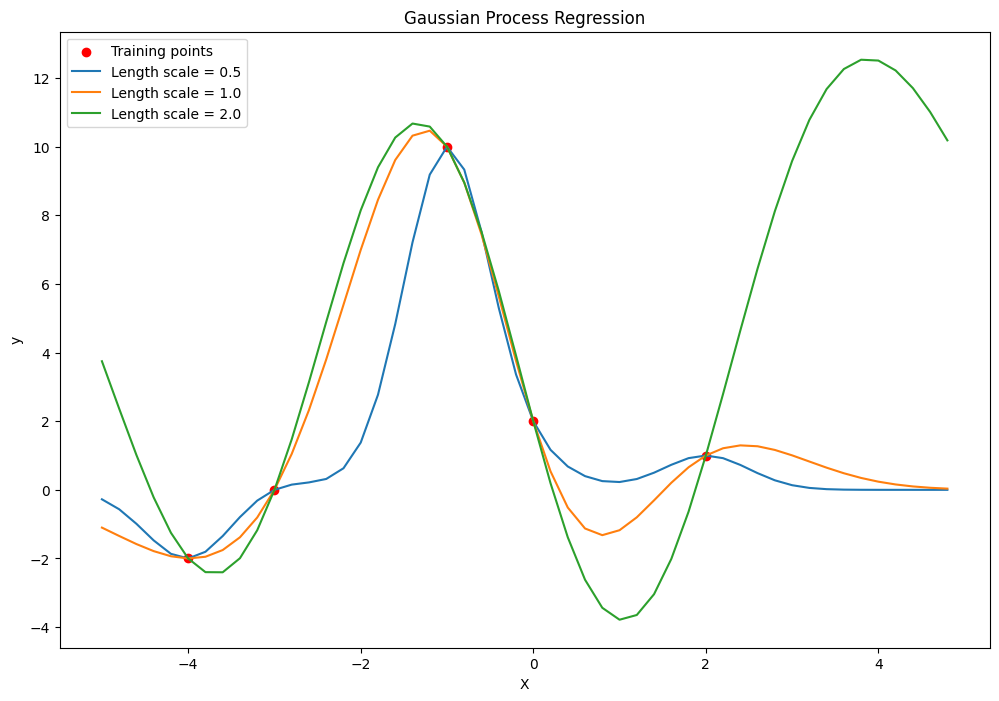

In [ ]:
X_train = np.array([-4, -3, -1, 0, 2]).reshape(-1, 1)
y_train = np.array([-2, 0, 10, 2, 1])
X_test = np.arange(-5, 5, 0.2).reshape(-1, 1)
length_scales = [0.5,1.0,2.0]
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='red', label='Training points')

for l in length_scales:
    y_mean, y_var = predict(X_train, y_train, X_test, l=l)
    plt.plot(X_test, y_mean.flatten(), label=f'Length scale = {l}')
    plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()